In [1]:
# Import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import scipy.stats as linregress
import dataframe_image as dfi

In [2]:
path = 'data/yelp_csv/yelp_csv_CLEAN.csv'

restaurants0_df = pd.read_csv(path)

# plt.savefig('Clean.png', bbox_inches='tight')

dfi.export(restaurants0_df.iloc[:5,:8],"CleanData.png")

restaurants0_df.head()

,Unnamed: 0,name,category,category_title,rating,price,review_count,display_address,address1,address2,address3,city,latitude,longitude,zip code,restaurant_id,price_integer
0,0,Tortas Frontera,mexican,Mexican,4.0,$$,1395,"['Terminal 3 - Gate K4', ""10000 W O'Hare Ave"",...",Terminal 3 - Gate K4,10000 W O'Hare Ave,Terminal 3 Concourse K Gate K4,Chicago,41.975438,-87.900137,60666,1zZvM7Zy__Oh533E4bt6_A,2.0
1,1,Farmer's Fridge,salad,Salad,4.5,$,62,"['10000 Ohare Way', 'Terminal 3 Gate K6', 'Chi...",10000 Ohare Way,NaN,Terminal 3 Gate K6,Chicago,41.975234,-87.898719,60666,4xQv1b1IFRsAWZu7yVLFrQ,1.0
2,2,Tortas Frontera,mexican,Mexican,4.0,$$,1321,"[""10000 W O'Hare Ave"", 'Terminal 1 - Gate B11'...",10000 W O'Hare Ave,NaN,Terminal 1 - Gate B11,Chicago,41.980026,-87.906679,60666,0k018u1PAtfmkNRYk04yCQ,2.0
3,3,Gaslight Club,newamerican,American (New),3.5,$$$,99,"[""Chicago O'Hare International Airport"", ""O'Ha...",Chicago O'Hare International Airport,NaN,O'Hare Hilton Hotel - Lobby Level,Chicago,41.977965,-87.905173,60666,MywzBEKWjmt0bcNajKt8yw,3.0
4,4,Big Bowl,chinese,Chinese,2.0,$$,36,"[""10000 West O'hare Ave"", 'Terminal 5; Gate M7...",10000 West O'hare Ave,NaN,Terminal 5; Gate M7,Chicago,41.975103,-87.891350,60666,6VZwwWxBmxMsKd10AIOjxg,2.0


In [3]:
# restaurants1_df = restaurants0_df.drop(columns=['Unnamed: 0'])
# restaurants1_df

In [4]:

# len(restaurants1_df['restaurant_id'].unique())

In [5]:
# Remove duplicate rows
# restaurants2_df = pd.DataFrame(restaurants1_df).drop_duplicates(keep='last',subset='restaurant_id')

In [6]:
# restaurants2_df.count()

In [7]:
# Check how many zip codes in original datafram
# restaurants2_df['zip code'].value_counts()

In [8]:
# List of Chicago zip codes comes from https://zipcode.org/city/IL/CHICAGO
# chi_zips = ['60701','60696','60693','60691','60690','60685','60684','60699',
#             '60697','60695','60694','60689','60688','60687','60686','60682',
#             '60681','60680','60678','60675','60674','60670','60669','60677',
#             '60673','60668','60666','60659','60657','60655','60654','60651',
#             '60649','60645','60644','60640','60639','60664','60661','60660',
#             '60656','60653','60652','60647','60646','60643','60642','60641',
#             '60638','60634','60633','60631','60637','60636','60632','60630',
#             '60629','60626','60625','60621','60620','60617','60616','60613',
#             '60612','60609','60628','60624','60623','60622','60619','60618',
#             '60615','60614','60611','60610','60608','60607','60606','60605',
#             '60604','60603','60602','60601','60290']

In [9]:
# Remove restaurants not in a Chicago zip code
# restaurants3_df = pd.DataFrame(restaurants2_df.loc[restaurants2_df['zip code'].isin(chi_zips),:])

In [10]:
# Check the count of non-missing values per column
# restaurants3_df.count()

In [11]:
# len(restaurants3_df['restaurant_id'].unique())

In [12]:
# restaurants3_df.reset_index(drop=True,inplace=True)
# restaurants3_df.head()

In [13]:
# restaurants3_df.dtypes

In [14]:
# restaurants3_df['price_integer'] = np.nan
# restaurants3_df.loc[restaurants3_df['price'] == "$", 'price_integer'] = 1
# restaurants3_df.loc[restaurants3_df['price'] == "$$", 'price_integer'] = 2
# restaurants3_df.loc[restaurants3_df['price'] == "$$$", 'price_integer'] = 3
# restaurants3_df.loc[restaurants3_df['price'] == "$$$$", 'price_integer'] = 4

In [15]:
# restaurants3_df.head()

In [16]:
# restaurants3_df['rating'].value_counts()

In [17]:
# restaurants3_df.to_csv('yelp_csv/yelp_csv_CLEAN.csv')

In [29]:
ratings_df = restaurants0_df.groupby("zip code")

mean_rating = round(ratings_df['rating'].mean(), 1)

median_rating = round(ratings_df['rating'].median(), 1)

std_rating = round(ratings_df['rating'].std(), 1)

var_rating = round(ratings_df['rating'].var(),1)




summary_stats = {"Mean": mean_rating,
                "Median": median_rating,
                "Variance": var_rating,
                "Std Deviation": std_rating}
                

summ_stats_df = pd.DataFrame(summary_stats)
summ_stats_df.columns=pd.MultiIndex.from_product([['Ratings Summary Stats'],summ_stats_df.columns])

dfi.export(summ_stats_df[:5],"SummStats.png")

summ_stats_df.head()

Ratings Summary Stats                              
                          Mean Median Variance Std Deviation
zip code                                                    
60601                      3.4    3.5      0.5           0.7
60602                      3.4    3.5      0.6           0.8
60603                      3.6    3.5      0.5           0.7
60604                      3.5    3.5      0.5           0.7
60605                      3.5    3.5      0.5           0.7

In [19]:
zip_codes = pd.DataFrame(ratings_df['zip code'].count())
zip_codes.head()

,zip code
zip code,
60601,133
60602,60
60603,87
60604,45
60605,115


In [20]:
restaurants0_df['review_count'].value_counts()

1       426
2       225
3       204
4       156
5       118
       ... 
365       1
734       1
1090      1
793       1
574       1
Name: review_count, Length: 927, dtype: int64

In [21]:
# Capomulin_df = Combined_data.loc[Combined_data["Drug Regimen"] == "Capomulin",:]

# zip_rating_df = restaurants3_df.loc[restaurants3_df["rating"] == (0<=5),:]
restaurants0_df["rating"].value_counts()

4.0    1860
3.5    1391
4.5    1045
3.0     787
2.5     551
5.0     435
2.0     393
1.5     206
1.0     176
Name: rating, dtype: int64

In [22]:
# fig1, ax1 = plt.subplots(figsize=(15, 10))
# place_hold =restaurants3_df.groupby(['price_integer']).mean()
place_hold = restaurants0_df.groupby(['zip code']).mean()
place_hold.dropna(how='any', inplace=True)

In [23]:
place_hold

,Unnamed: 0,rating,review_count,latitude,longitude,price_integer
zip code,,,,,,
60601,5574.962406,3.413534,259.060150,41.886471,-87.625327,1.726415
60602,5608.350000,3.450000,182.833333,41.882982,-87.629100,1.553191
60603,5687.655172,3.614943,263.195402,41.880933,-87.628414,1.940299
60604,5750.844444,3.544444,101.088889,41.878201,-87.628853,1.371429
60605,5478.260870,3.534783,287.756522,41.871184,-87.626706,1.717391
60606,5526.978571,3.553571,117.221429,41.881563,-87.636476,1.480392
60607,5086.433594,3.652344,328.433594,41.877441,-87.653331,1.902174
60608,4575.145729,3.701005,134.703518,41.850874,-87.666192,1.446541
60609,3009.989362,3.372340,32.361702,41.813338,-87.657468,1.242424


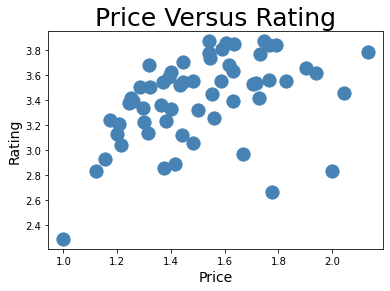

In [32]:
marker_size=15
plt.scatter(place_hold["price_integer"],place_hold['rating'],s=175, color="steelblue")
plt.title('Price Versus Rating',fontsize =25)
plt.xlabel('Price',fontsize =14)
plt.ylabel('Rating',fontsize =14)

plt.savefig('ScatterPlot.png', bbox_inches='tight')

plt.show()

In [25]:
corr=round(st.pearsonr(place_hold['price_integer'],place_hold['rating'])[0],2)
print(f"The correlation between price and rating is {corr}")

The correlation between price and rating is 0.43


In [26]:
def linearRegression(x_values,y_values,regEQplotX,regEQplotY,y_label):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
#     print(f'The r-square is {rvalue}')
    print(line_eq)
    plt.annotate(line_eq,(eqX,eqY),fontsize=15,color="red")


In [27]:
x_values = place_hold['price_integer']
y_values = place_hold['rating']

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept

print(f"slope:{slope}")
print(f"intercept:{intercept}")
print(f"rvalue (Correlation coefficient):{rvalue}")
print(f"pandas (Correlation coefficient):{corr}")
print(f"stderr:{stderr}")

line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

print(line_eq)

slope:0.5898543329837714
intercept:2.5167474620726393
rvalue (Correlation coefficient):0.42851948607654305
pandas (Correlation coefficient):0.43
stderr:0.16473298519741753
y = 0.59x + 2.52


y = 0.59x + 2.52
The r-squared is: 0.18362894994730458


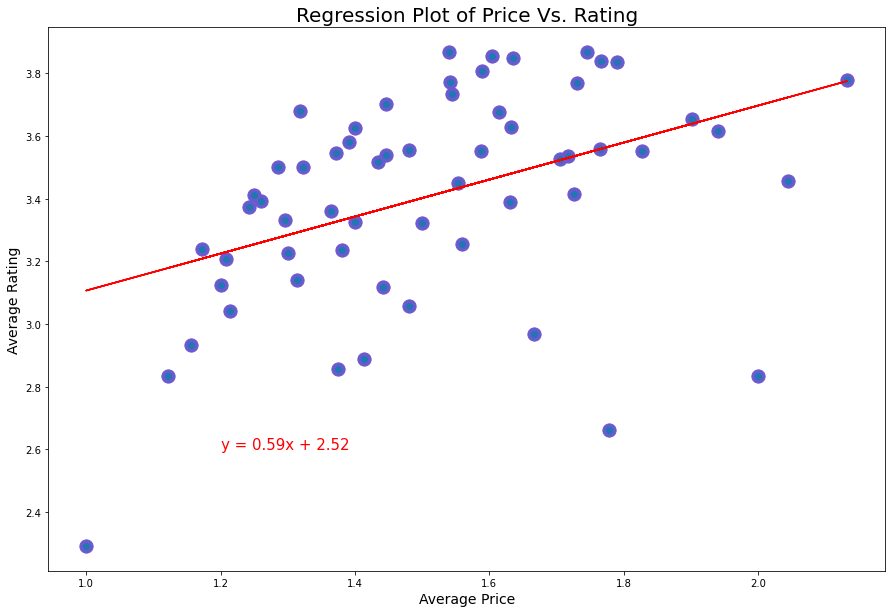

In [28]:
# Add the linear regression equation and line to plot
eqX = 1.2
eqY = 2.6

fig1, ax1 = plt.subplots(figsize=(15, 10))
plt.scatter(x_values,y_values,s=175, color="slateblue")
plt.plot(x_values,regress_values,"r-")
plt.title('Regression Plot of Price Vs. Rating',fontsize =20)
plt.xlabel('Average Price',fontsize =14)
plt.ylabel('Average Rating',fontsize =14)
ax1.annotate(line_eq, xy=(20, 40), xycoords='data',xytext=(0.8, 0.95), textcoords='axes fraction',horizontalalignment='right', verticalalignment='top',fontsize=30,color="red")
linearRegression(x_values,y_values,eqX,eqY,'y_label')

print(f"The r-squared is: {rvalue**2}")

plt.savefig('Scatter.png', bbox_inches='tight')
plt.show()